# Using Metadensity in Jupter notebooks
This notebook showcases SF3B4, U2 density around branchpoints

In [1]:
# set up files associated with each genome coordinates
import metadensity as md
md.settings.from_config_file('/home/hsher/projects/Metadensity/config/hg38.ini')


# then import the modules
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I have a precompiles list of ENCODE datas as a csv that loads in this dataloader
import sys
sys.path.append('/home/hsher/projects/Metadensity/scripts')
from dataloader import *
%matplotlib inline

plt.style.use('seaborn-white')

please set the right config according to genome coordinate
Using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


## load RBPs into eCLIP object

In [2]:
HepG2 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'U2AF1')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)
K562 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'U2AF1')&(encode_data['Cell line'] == 'K562')].iloc[0],
                          single_end = False)


In [3]:
clips = [HepG2, K562]

# Calulcate Density and Truncation sites
Object `Metatruncation` and `Metadensity` takes three things:
1. an experiment object `eCLIP` or `STAMP`.
2. a set of transcript pyBedTools that you want to plot on
3. name of the object

Options include:
1. `sample_no=` allows you to decide how many transcript you want to build the density. It will take longer. By default, `sample_no=200`. So in transcript if you give more than 200 transcripts, only 200 will be used
2. `metagene` allows you to use pre-built metagene. This feature is more useful when you want to compare the same set of RNA over many RBPs.
3. `background_method` handles how you want to deal with IP v.s. Input
4. `normalize` handles how you want to normalize values within a transcript.

## Difference between truncation and density

`Metadensity` represents read coverage. `Metatruncation` represents the 5' end of read 2 for `eCLIP`; edit sites for `STAMP`.

In [4]:
transcripts_with_idr = transcript.intersect(HepG2.idr, s = True).intersect(K562.idr, s = True)

In [5]:
m1 = Metadensity(HepG2, 'U2AF1 HepG2',background_method = 'relative information',
                normalize = False, transcripts = transcripts_with_idr)
m1.get_density_array()

m2 = Metadensity(K562, 'U2AF1 K562',background_method = 'relative information', 
                 normalize = False,
                transcripts = transcripts_with_idr)
m2.get_density_array()

Using: /home/hsher/projects/Metadensity/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/projects/Metadensity/metadensity/data/hg38/gencode
Done building metagene


# Median and Mean density

In [6]:
color_dict = {'U2AF1 HepG2': 'seagreen', 'U2AF1 K562':'pink'}

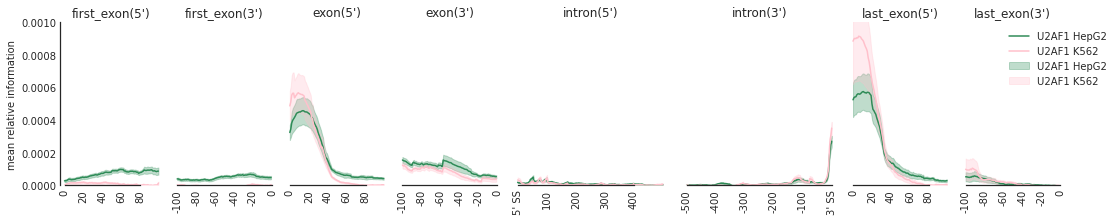

In [7]:
f=plot_mean_density([m1,m2],
                    features_to_show = generic_rna,
                   color_dict = color_dict)
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')
f.savefig('SF3B4_rna.svg', dpi = 300)